In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

Завдання 1. Змоделювати реалізації ціни акцій та волатильності

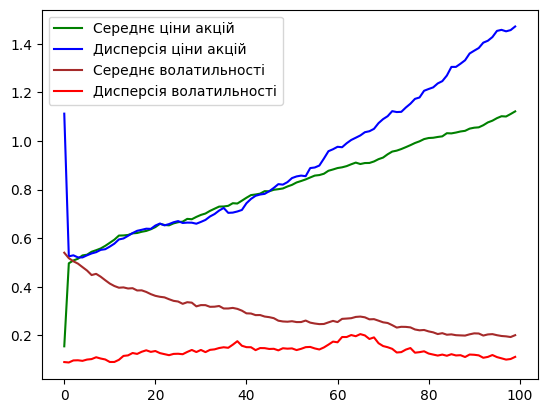

In [11]:
M = 5000 #кількість доданків
T = np.linspace(0, 1, 100)
dt =0.01

#стандартний вінерівський процес 1
def W1():
    etas = [random.gauss(0,1) for x in range(M)]
    def w1(M, t):
        sum = 0
        for k in range(M):
            sum+=(etas[k]*math.sin(((k-0.5)*math.pi*t)))/(math.pi*(k-0.5))
        return math.sqrt(2)*sum
    return [w1(M,t)for t in T]

#стандартний вінерівський процес 2
def W2():
    t = np.arange(0, 1, dt)
    etas = [random.gauss(0,1) for x in range(M)]
    def w2(M, t):
        sum = 0
        for i in range(1, M):
            sum += etas[i] * math.sin(i*math.pi*t) / (i*math.pi)
        return t * etas[0] + math.sqrt(2) * sum
    return [w2(M, t) for t in T]

#реалізація моделі Хестона
def heston_model(W1, W2, mu, k, theta, eps):
    #початкове значення волатильності
    sigma_0 = random.uniform(0, 1)
    #початкове значення ціни акцій
    S_0 = random.gauss(0, 1)
    delta_t = T[1]-T[0]
    S = [S_0]
    sigma = [sigma_0]
    for t in range(0, len(T)-1):
        #моделюємо значення ціни акцій - формула 1
        S_new = max(S[t] + mu * S[t] * delta_t + math.sqrt(sigma[t]) * (W1[t+1] - W1[t]), 0)
        S.append(S_new)
        #моделюємо значення волатильності - формула 2
        sigma_new = max(sigma[t] + k * (theta - sigma[t]) * delta_t + eps * math.sqrt(sigma[t]) * (W2[t+1] - W2[t]), 0)
        sigma.append(sigma_new)

    return S, sigma

#оцінка середнього та дисперсії для ціни акцій та волатильності
def calc_mean_variance(arr1, arr2):
    num_time_steps = arr1.shape[1]

    s_means = [np.mean(arr1[:, i]) for i in range(num_time_steps)]
    s_vars = [np.var(arr1[:, i]) for i in range(num_time_steps)]
    v_means = [np.mean(arr2[:, i]) for i in range(num_time_steps)]
    v_vars = [np.var(arr2[:, i]) for i in range(num_time_steps)]

    return s_means, s_vars, v_means, v_vars

K = 170
results = np.array([heston_model(W1(), W2(),0.4, 2, 0.1, 1.3) for k in range(K)])

st = np.array([result[0] for result in results])
sgt = np.array([result[1] for result in results])

stock_means, stock_variances, volatility_means, volatility_variances = calc_mean_variance(st, sgt)

plt.plot(stock_means, color ='green', label = "Середнє ціни акцій")
plt.plot(stock_variances, color ='blue', label = "Дисперсія ціни акцій")
plt.plot(volatility_means, color ='brown', label = "Середнє волатильності")
plt.plot(volatility_variances, color ='red', label = "Дисперсія волатильності")
plt.legend()
plt.show()

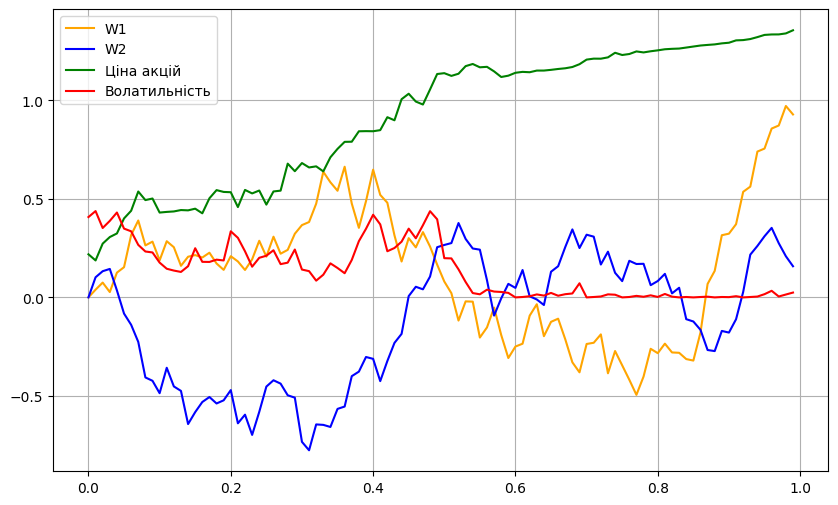

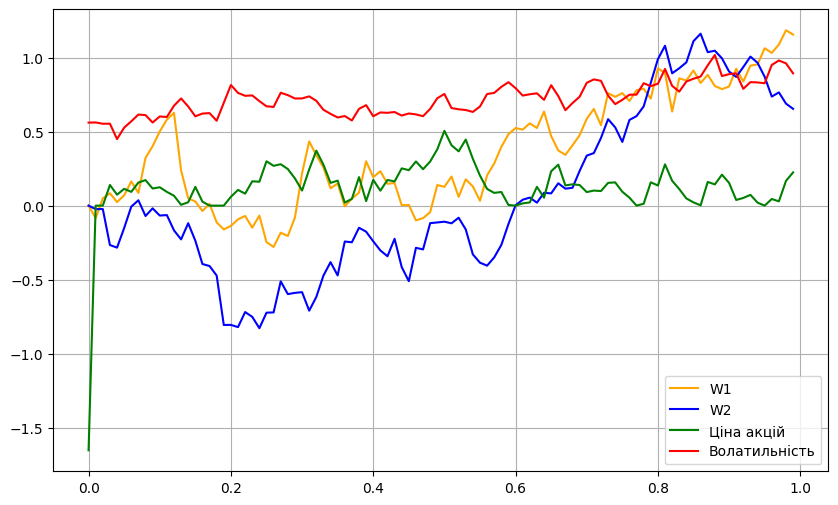

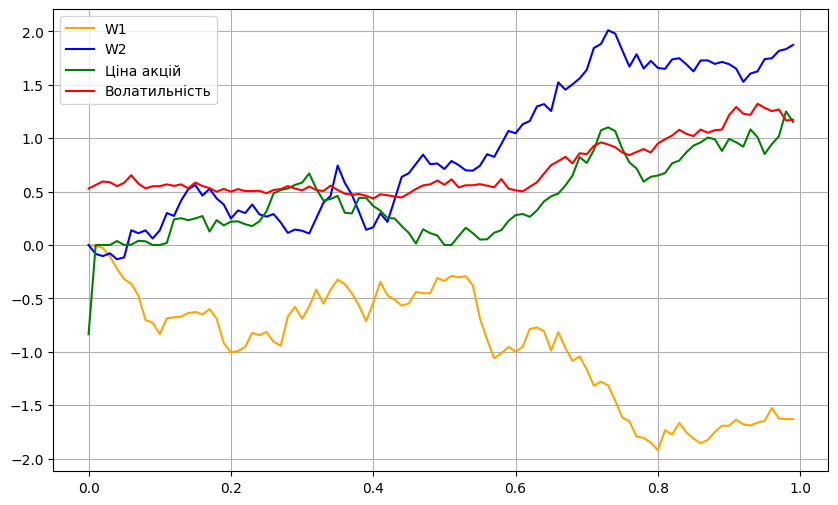

In [16]:
mu1,k1,teta1,eps1 = 0.4,2,0.1,1.3
mu2,k2,teta2,eps2 = -0.3,1,0.9,0.7
mu3,k3,teta3,eps3 = 1.1,-0.5,-0.7,-0.5

S_t1,sigma_t1 = heston_model(W1(),W2(),mu1,k1,teta1,eps1)
S_t2,sigma_t2 = heston_model(W1(),W2(),mu2,k2,teta2,eps2)
S_t3,sigma_t3 = heston_model(W1(),W2(),mu3,k3,teta3,eps3)

#моделювання для різних параметрів моделі Хестона
def plot(W1, W2, S_t, sigma_t):
    t_values = np.arange(0, 1, dt)
    W1 = np.array(W1)
    W2 = np.array(W2)
    S_t = np.array(S_t)
    sigma_t = np.array(sigma_t)

    plt.figure(figsize=(10, 6))

    # Plot W1
    plt.plot(t_values, W1, label='W1', color="orange")

    # Plot W2
    plt.plot(t_values, W2, label='W2', color="blue")

    # Plot S_t
    plt.plot(t_values, S_t, label='Ціна акцій', color="green")

    # Plot sigma_t
    plt.plot(t_values, sigma_t, label='Волатильність', color="red")

    plt.legend()
    plt.grid(True)
    plt.show()

plot(W1(),W2(),S_t1,sigma_t1)
plot(W1(),W2(),S_t2,sigma_t2)
plot(W1(),W2(),S_t3,sigma_t3)

Завдання 2. Змоделювати ціну акцій та оцінити точність.

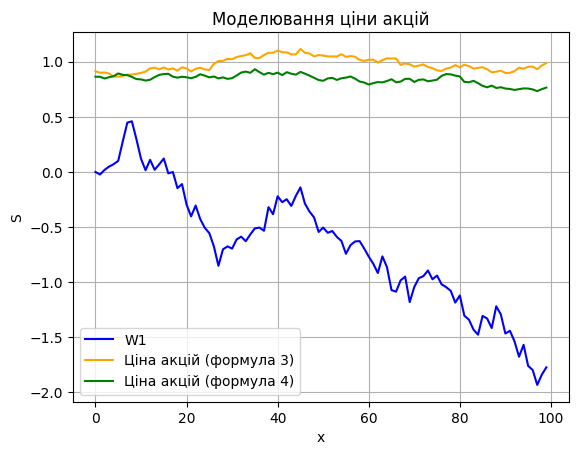

In [45]:
M = 5000
dt = 0.01

#моделювання ціни акцій за формулою 3
def S1(mu, sigma, W):
    S0 = np.random.normal(0, 1)
    S = [S0]
    for i in range(1, len(W)):
        dS = mu * S[-1] * dt + sigma * S[-1] * (W[i] - W[i-1])
        S.append(S[-1] + dS)
    return S

#моделювання ціни акцій за формулою 4
def S2(mu, sigma, W):
    S0 = np.random.normal(0, 1)
    B0 = 1   # Початкове значення B
    S = [S0]
    B = [B0]
    for i in range(1, len(W)):
        dB = mu * i*dt
        B.append(B[0] * np.exp(dB))
        St = (S[0]/B[0]) * B[-1] * np.exp(sigma*W[i-1]-(sigma*i*dt/2))#sigma * (W[i] - W[i-1] - 0.5 * sigma * dt)
        S.append(St)
    return S

mu = 0.05  # Очікувана дохідність
sigma = 0.2  # Волатильність

plt.plot(W1(), label="W1", color = "blue")
plt.plot(S1(mu, sigma, W1()), label='Ціна акцій (формула 3)', color = "orange")
plt.plot(S2(mu, sigma, W1()), label='Ціна акцій (формула 4)', color = "green")
plt.xlabel('x')
plt.ylabel('S')
plt.title('Моделювання ціни акцій')
plt.legend()
plt.grid(True)
plt.show()